<a href="https://colab.research.google.com/github/Miseq/dw_matrix_road_sign_detection/blob/master/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three


In [3]:
cd dw_matrix_road_sign_detection/

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign_detection


In [4]:
ls

data/  LICENSE  README.md


In [5]:
cd data/

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign_detection/data


In [6]:
train = pd.read_pickle('train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [7]:
cd ..

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign_detection


In [8]:
x_train, y_train = train['features'], train['labels']
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

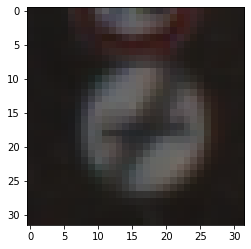

In [9]:
plt.imshow(x_train[0])

In [10]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [11]:
dict_signs =  signs.to_dict()['b']
dict_signs[30]

'Beware of ice/snow'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


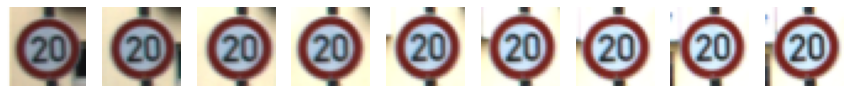

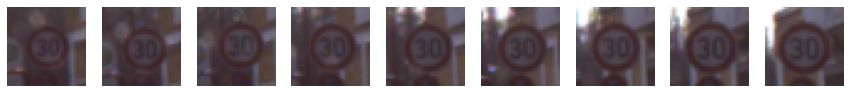

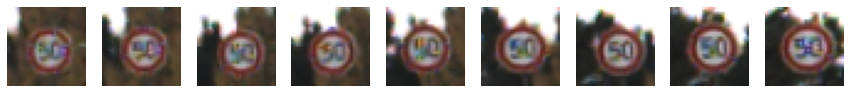

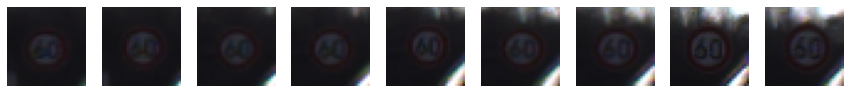

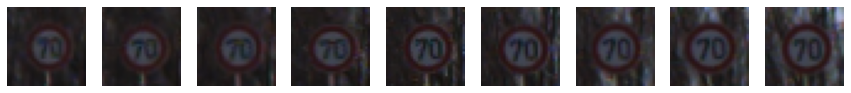

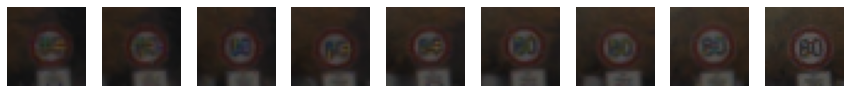

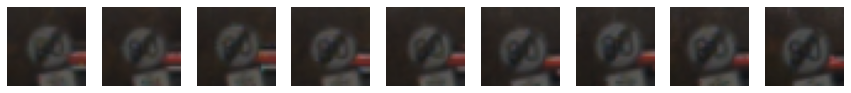

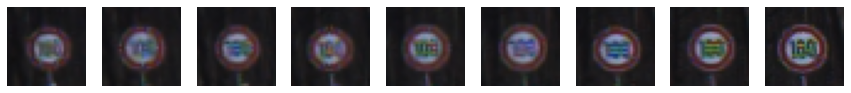

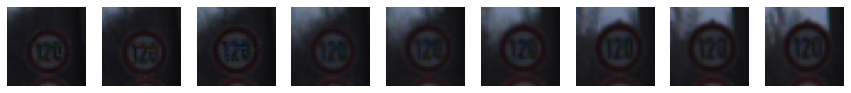

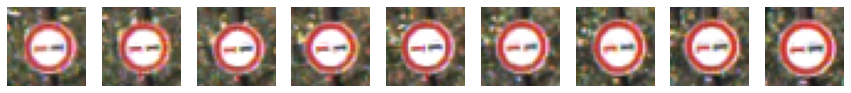

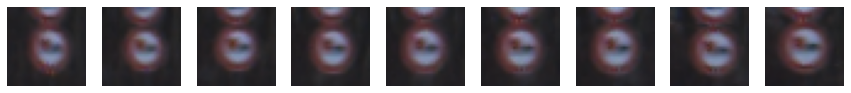

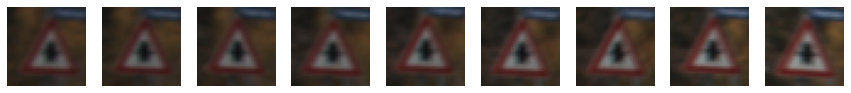

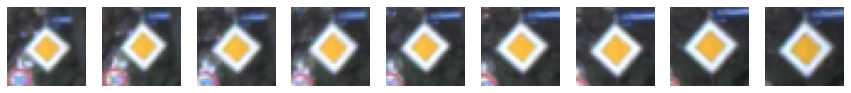

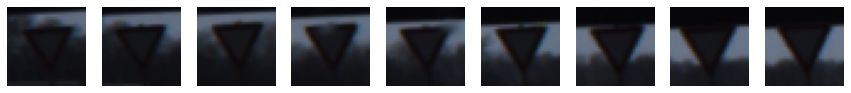

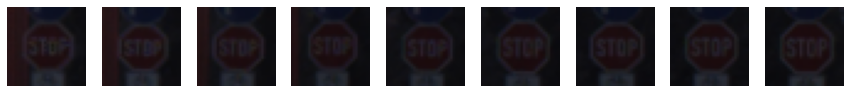

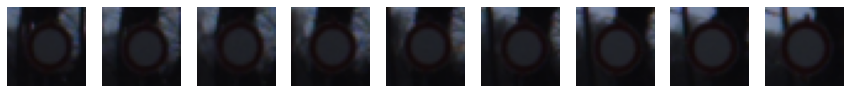

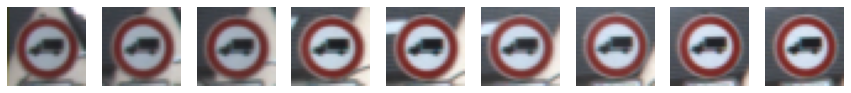

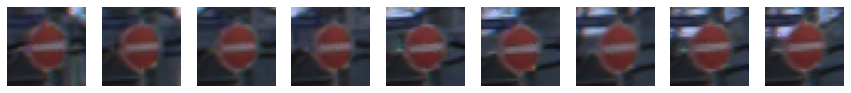

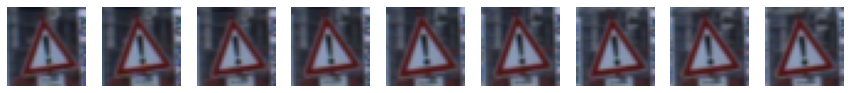

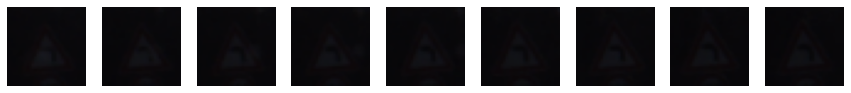

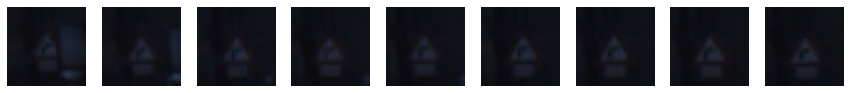

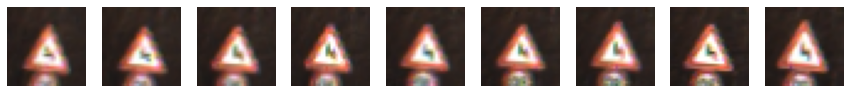

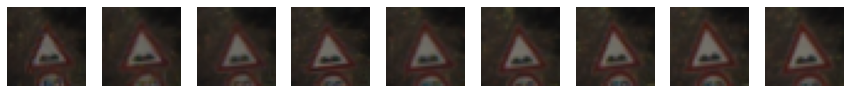

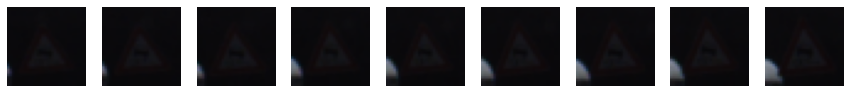

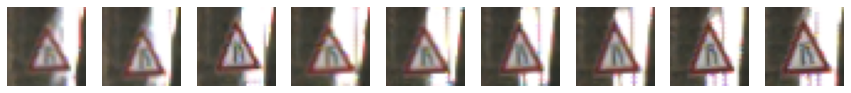

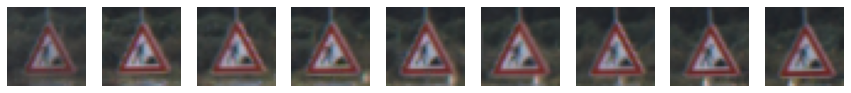

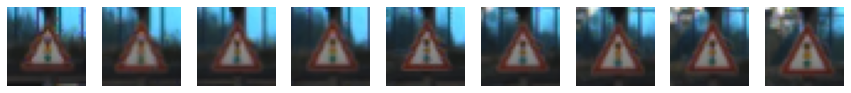

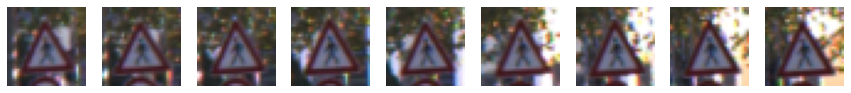

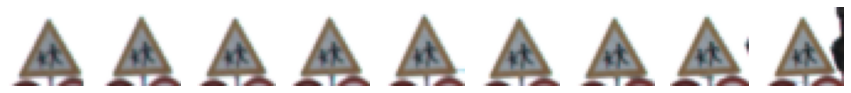

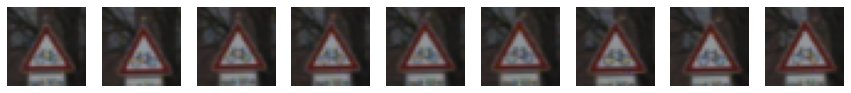

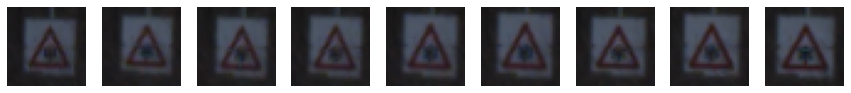

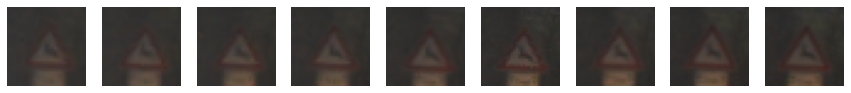

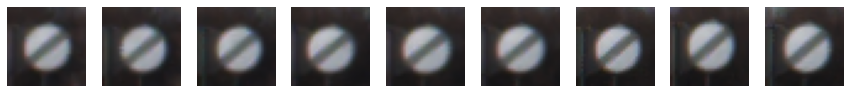

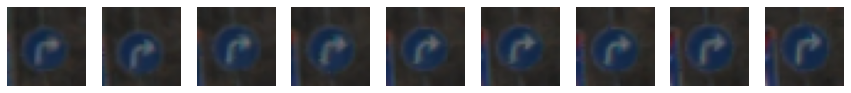

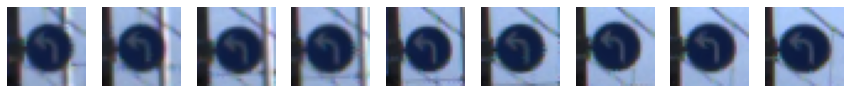

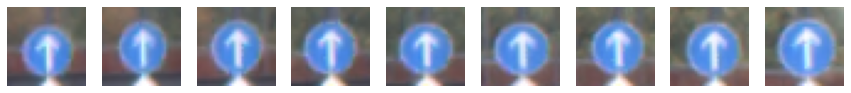

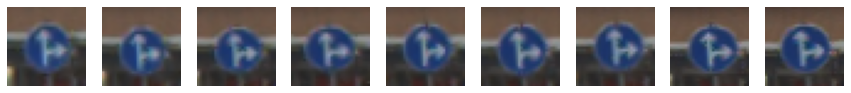

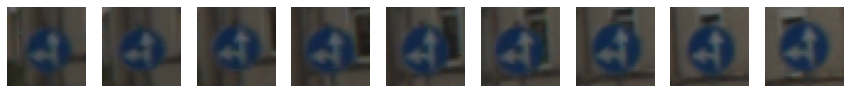

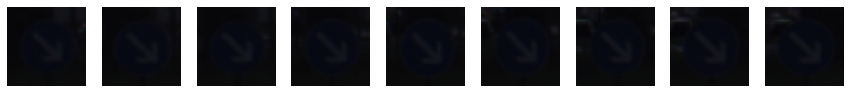

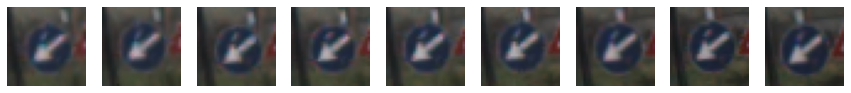

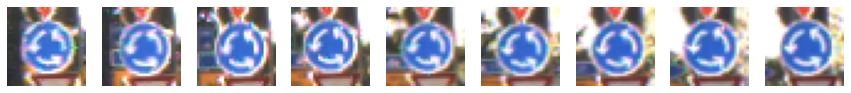

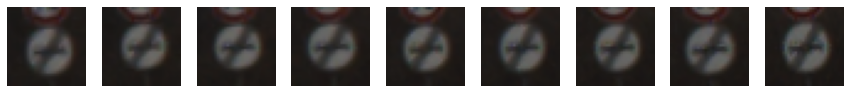

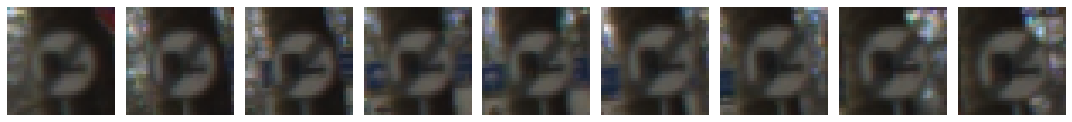

In [12]:
for id_sign in dict_signs.keys():
  given_signs = x_train[ y_train == id_sign ] ## ile jest takich znakow
  plt.figure(figsize=(15,5))

  for i in range(9):
    plt.subplot(f'19{i+1}')
    plt.imshow(given_signs[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [0]:
cnt = Counter(y_train).most_common()
id_labels, cnt_labels = zip(*cnt)

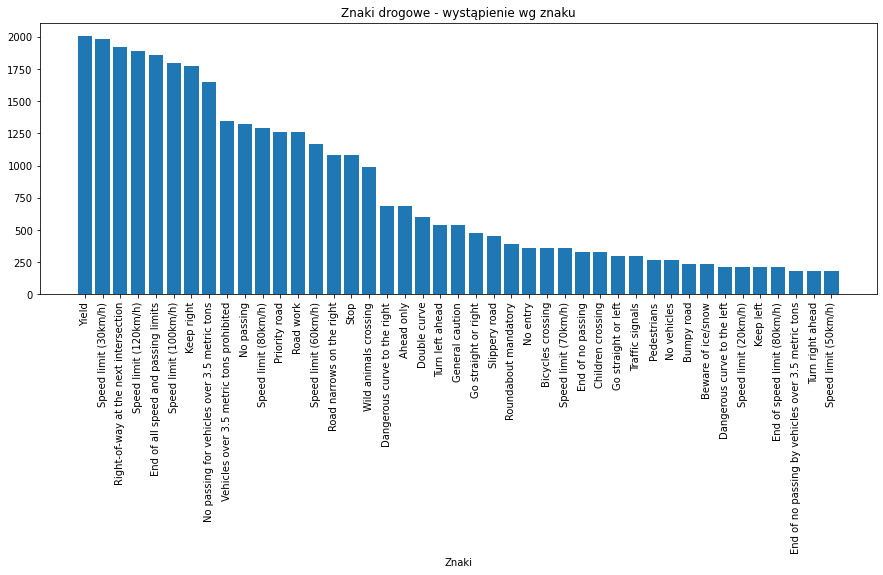

In [25]:
ids = range(len(id_labels))
plt.figure(figsize=(15,5))


plt.xlabel('Znaki')
labels = [dict_signs[id_labels[id_]] for id_ in id_labels ]
plt.bar(ids, cnt_labels)

plt.xticks(ids, labels, rotation='vertical')   # id na osi x jest niezalezne od id znaku drogowego(dotyczy wpisu w plocie) co moze prowadzic do pomylek
plt.title('Znaki drogowe - wystąpienie wg znaku')
plt.show()